#4) Sequence Tracking

In [ ]:
from collections import Counter
from collections import defaultdict

##a) for GLM

finding the most common action sequence

In [ ]:
# Convert the lists to tuples (lists are unhashable and cant be counted directly)
final_df['action_sequences_tuple'] = final_df['action_sequences'].apply(tuple)

# Count how many times each unique action sequences occurs
sequence_counts = Counter(final_df['action_sequences_tuple'])

# Find the most common action sequence
most_common_sequence, count = sequence_counts.most_common(1)[0]

print("Most Common Action Sequence:")
print(most_common_sequence)
print(f"Count: {count}")

Most Common Action Sequence:
(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0)
Count: 38


###i) Accuracy as a function of Sequence Position

1232/1232 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


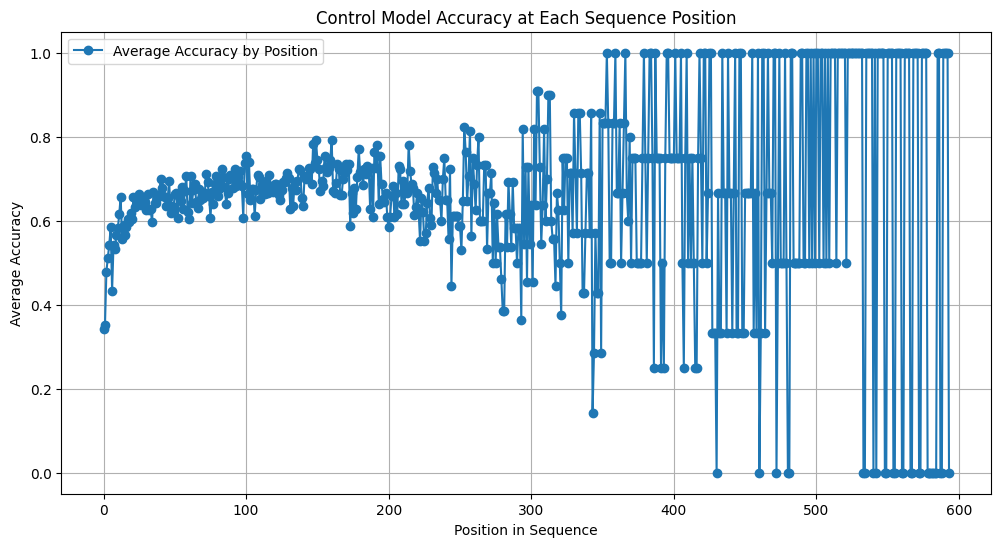

In [ ]:
from collections import defaultdict

#compute accuracy by position
predictions1 = glm_model.predict(Cont_X_val, batch_size=32) #predicts the probabilities of each row for the validation data
predicted_classes1 = np.argmax(predictions1, axis=1) #picks the action with the highest probability for each row, giving the predicted action

# Compare predictions to true values
correct_predictions1 = (predicted_classes1 == Cont_y_val).astype(int)

# Group by position and compute average accuracy
position_accuracies1 = defaultdict(list)

for position, is_correct in zip(positions_val, correct_predictions1):
    position_accuracies1[position].append(is_correct)

# Calculate average accuracy for each position
avg_accuracy_by_position1 = {pos: np.mean(accs) for pos, accs in position_accuracies1.items()}

#plot
positions_sorted1 = sorted(avg_accuracy_by_position1.keys())
accuracies_sorted1 = [avg_accuracy_by_position1[pos] for pos in positions_sorted1]

plt.figure(figsize=(12, 6))
plt.plot(positions_sorted1, accuracies_sorted1, marker='o', label='Average Accuracy by Position')
plt.xlabel('Position in Sequence')
plt.ylabel('Average Accuracy')
plt.title('Control Model Accuracy at Each Sequence Position')
plt.grid(True)
plt.legend()
plt.show()

####Log scale version of accuracy at sequence position

1232/1232 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


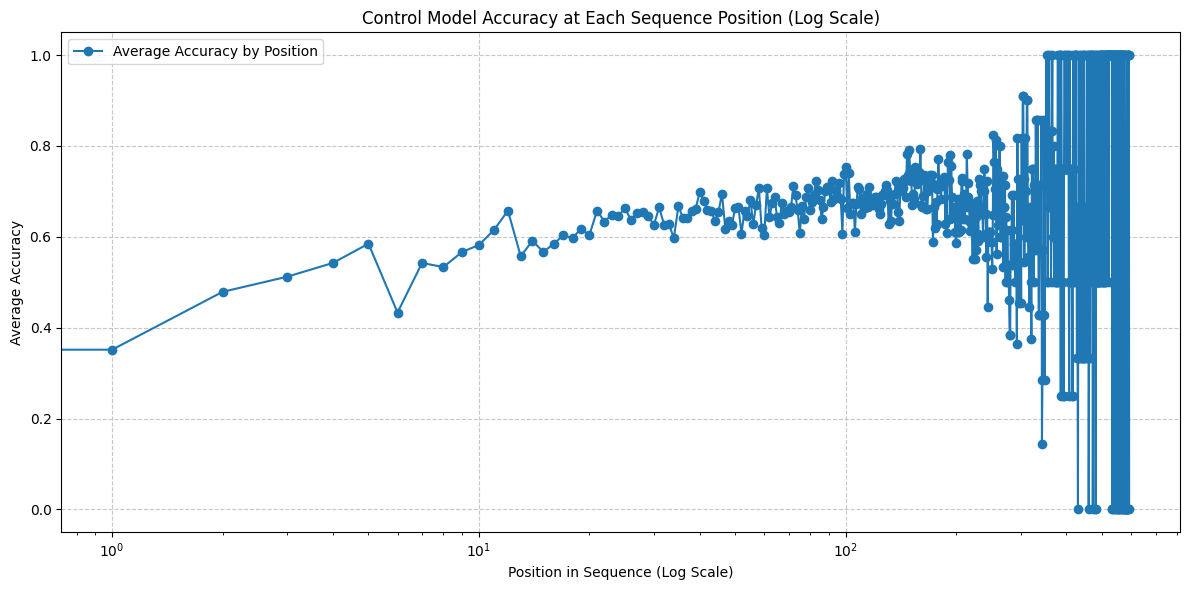

In [ ]:
#compute accuracy by position
predictions1 = glm_model.predict(Cont_X_val, batch_size=32) #predicts the probabilities of each row for the validation data
predicted_classes1 = np.argmax(predictions1, axis=1) #picks the action with the highest probability for each row, giving the predicted action

# Compare predictions to true values
correct_predictions1 = (predicted_classes1 == Cont_y_val).astype(int)

# Group by position and compute average accuracy
position_accuracies1 = defaultdict(list)

for position, is_correct in zip(positions_val, correct_predictions1):
    position_accuracies1[position].append(is_correct)

# Calculate average accuracy for each position
avg_accuracy_by_position1 = {pos: np.mean(accs) for pos, accs in position_accuracies1.items()}

positions_sorted1 = sorted(avg_accuracy_by_position1.keys())
accuracies_sorted1 = [avg_accuracy_by_position1[pos] for pos in positions_sorted1]

# Plot the results with logarithmic x-axis
plt.figure(figsize=(12, 6))
plt.plot(positions_sorted1, accuracies_sorted1, marker='o', label='Average Accuracy by Position')
plt.xscale("log")  # Set x-axis to logarithmic scale
plt.xlabel('Position in Sequence (Log Scale)')
plt.ylabel('Average Accuracy')
plt.title('Control Model Accuracy at Each Sequence Position (Log Scale)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


#### Accuracy at first 20 sequence positions

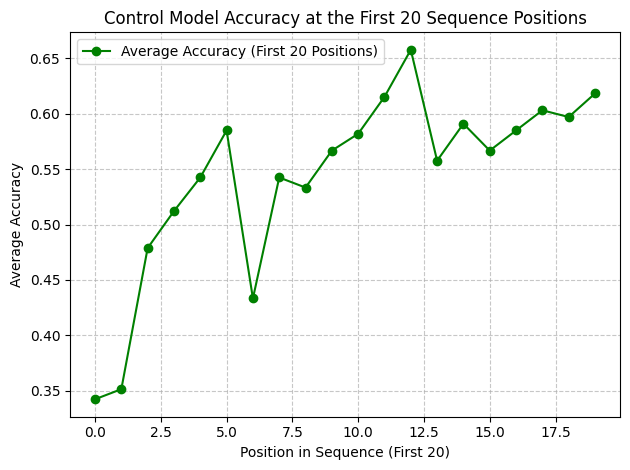

In [ ]:
#Focusing on the first 20 positions
first_20_positions = [pos for pos in positions_sorted1 if pos < 20]
first_20_accuracies = [avg_accuracy_by_position1[pos] for pos in first_20_positions]

#plotting
plt.plot(first_20_positions, first_20_accuracies, marker='o', color='green', label='Average Accuracy (First 20 Positions)')
plt.xlabel('Position in Sequence (First 20)')
plt.ylabel('Average Accuracy')
plt.title('Control Model Accuracy at the First 20 Sequence Positions')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

####accuracy by binned sequence positions

Positions with NaN values: []
Total NaN values: 0


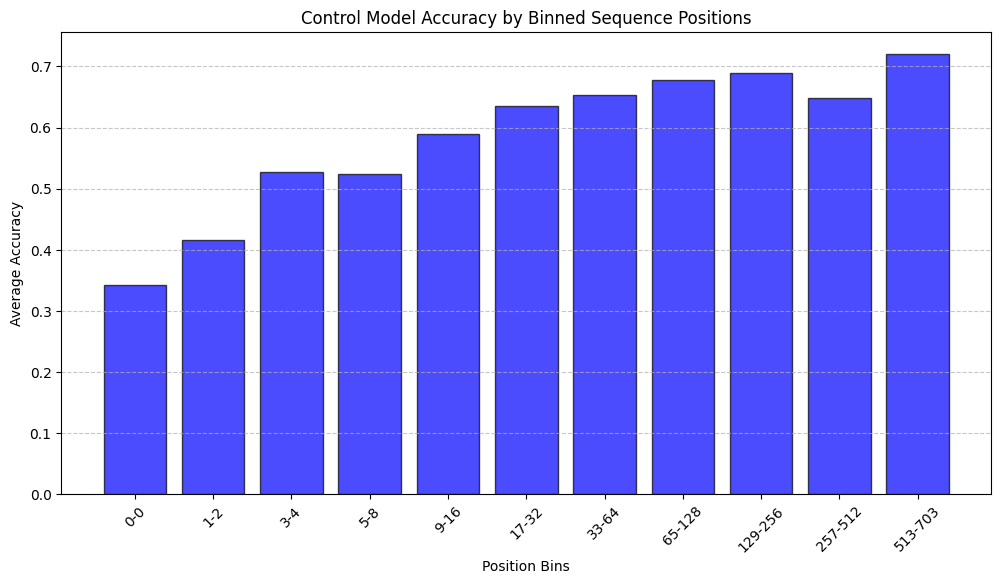

In [ ]:
# Step 1: Define new bins and labels
bins = [0, 1, 3, 5, 9, 17, 33, 65, 129, 257, 513, 704]  # Explicit bin edges
bin_labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins) - 1)]  # Custom labels for bins

# Step 2: Group positions by bins
position_bins1 = pd.cut(positions_val, bins=bins, labels=bin_labels, right=False)

# Check for NaN values in bins
nan_positions1 = positions_val[pd.isnull(position_bins1)]
print(f"Positions with NaN values: {nan_positions1}")
print(f"Total NaN values: {len(nan_positions1)}")

# Initialize a dictionary to hold accuracies for each bin
bin_accuracies1 = defaultdict(list)

# Group accuracies into bins
for pos, is_correct, bin_label in zip(positions_val, correct_predictions1, position_bins1):
    if pd.notnull(bin_label):  # Ensure bin label is not NaN
        bin_accuracies1[bin_label].append(is_correct)

# Step 3: Calculate average accuracy for each bin
avg_accuracy_by_bin1 = {bin_label: np.mean(accs) for bin_label, accs in bin_accuracies1.items()}

# Ensure all bins are represented, even if empty
accuracies_sorted_bar1 = [avg_accuracy_by_bin1.get(bin_label, 0) for bin_label in bin_labels]

# Step 4: Plot the results
plt.figure(figsize=(12, 6))
plt.bar(bin_labels, accuracies_sorted_bar1, color='blue', alpha=0.7, edgecolor='black')
plt.xticks(rotation=45)
plt.xlabel('Position Bins')
plt.ylabel('Average Accuracy')
plt.title('Control Model Accuracy by Binned Sequence Positions')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


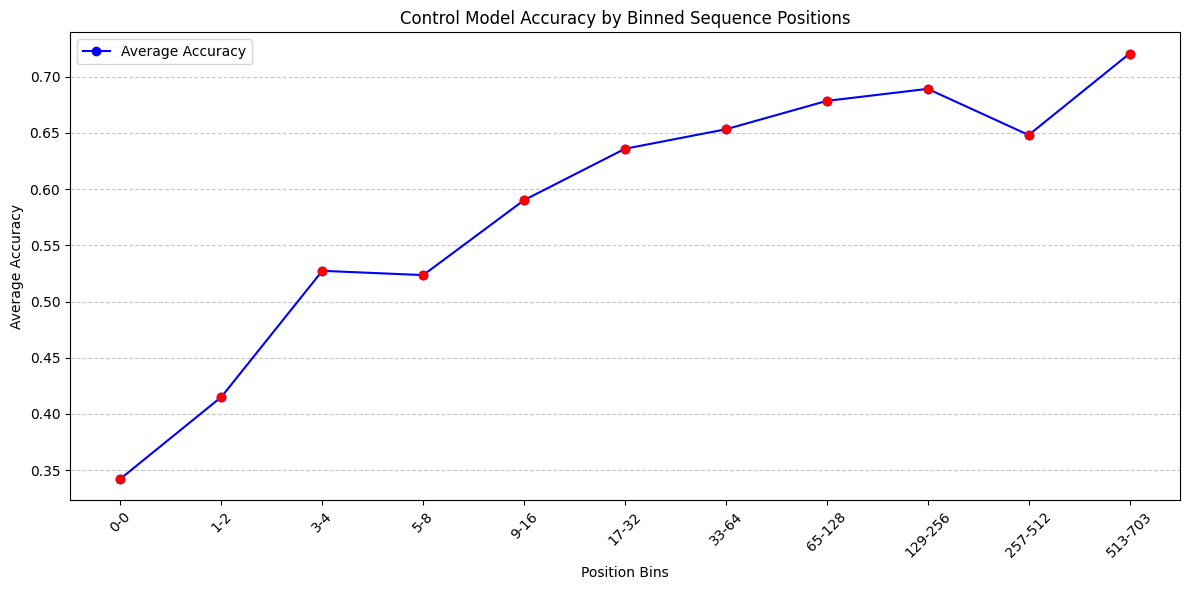

In [ ]:
# Step 4: Plot the results as a line plot
plt.figure(figsize=(12, 6))

# Create a line plot with markers for each bin
plt.plot(bin_labels, accuracies_sorted_bar1, marker='o', color='blue', label='Average Accuracy')

# Optional: Add scatter points for better emphasis
plt.scatter(bin_labels, accuracies_sorted_bar1, color='red', zorder=5)

# Formatting the plot
plt.xticks(rotation=45)
plt.xlabel('Position Bins')
plt.ylabel('Average Accuracy')
plt.title('Control Model Accuracy by Binned Sequence Positions')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()


###ii) Accuracy as a function of reversed sequence position

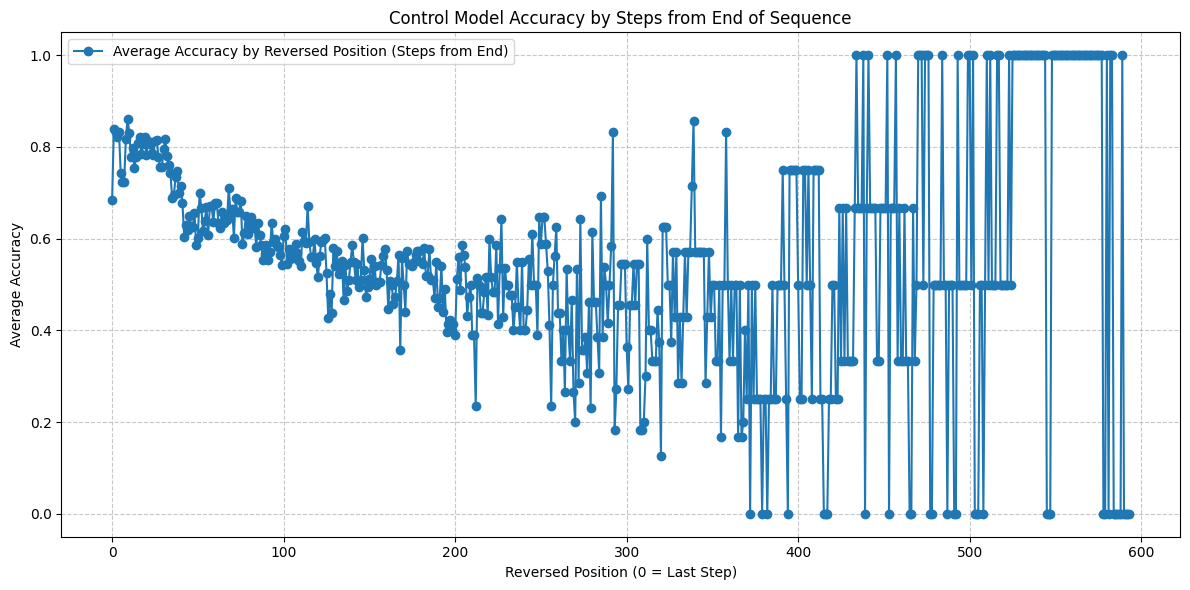

In [ ]:
# Group accuracies by reversed positions
reversed_position_accuracies = defaultdict(list)

# Group accuracies into bins by reversed positions
for position, is_correct in zip(reversed_positions_val, correct_predictions1):
    reversed_position_accuracies[position].append(is_correct)

# Calculate average accuracy for each reversed position
avg_accuracy_by_reversed_position = {
    pos: np.mean(accs) for pos, accs in reversed_position_accuracies.items()
}

# Sort the reversed positions in ascending order
positions_sorted_reversed = sorted(avg_accuracy_by_reversed_position.keys())
accuracies_sorted_reversed = [
    avg_accuracy_by_reversed_position[pos] for pos in positions_sorted_reversed
]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(
    positions_sorted_reversed,
    accuracies_sorted_reversed,
    marker="o",
    label="Average Accuracy by Reversed Position (Steps from End)",
)
plt.xlabel("Reversed Position (0 = Last Step)")
plt.ylabel("Average Accuracy")
plt.title("Control Model Accuracy by Steps from End of Sequence")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


####Log scale version of accuracy at reversed sequence position

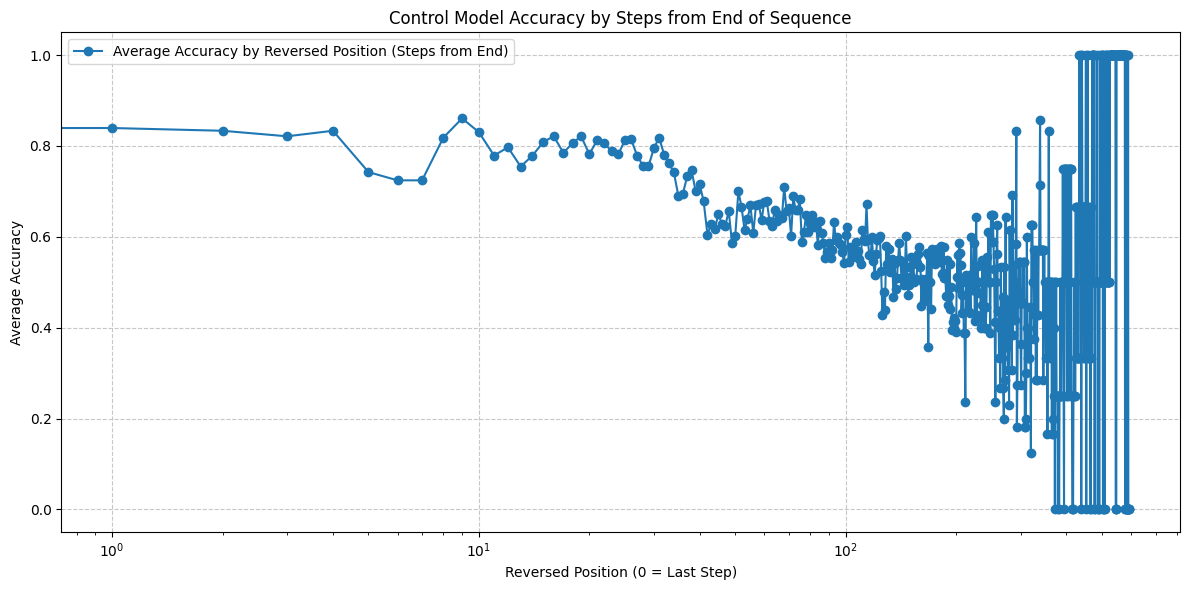

In [ ]:
# Group accuracies by reversed positions
reversed_position_accuracies = defaultdict(list)

# Group accuracies into bins by reversed positions
for position, is_correct in zip(reversed_positions_val, correct_predictions1):
    reversed_position_accuracies[position].append(is_correct)

# Calculate average accuracy for each reversed position
avg_accuracy_by_reversed_position = {
    pos: np.mean(accs) for pos, accs in reversed_position_accuracies.items()
}

# Sort the reversed positions in ascending order
positions_sorted_reversed = sorted(avg_accuracy_by_reversed_position.keys())
accuracies_sorted_reversed = [
    avg_accuracy_by_reversed_position[pos] for pos in positions_sorted_reversed
]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(
    positions_sorted_reversed,
    accuracies_sorted_reversed,
    marker="o",
    label="Average Accuracy by Reversed Position (Steps from End)",
)
plt.xlabel("Reversed Position (0 = Last Step)")
plt.ylabel("Average Accuracy")
plt.title("Control Model Accuracy by Steps from End of Sequence")
plt.xscale("log")  # Set x-axis to logarithmic scale
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


####Accuracy by binned reverse sequence position

Reversed positions with NaN values: []
Total NaN values: 0


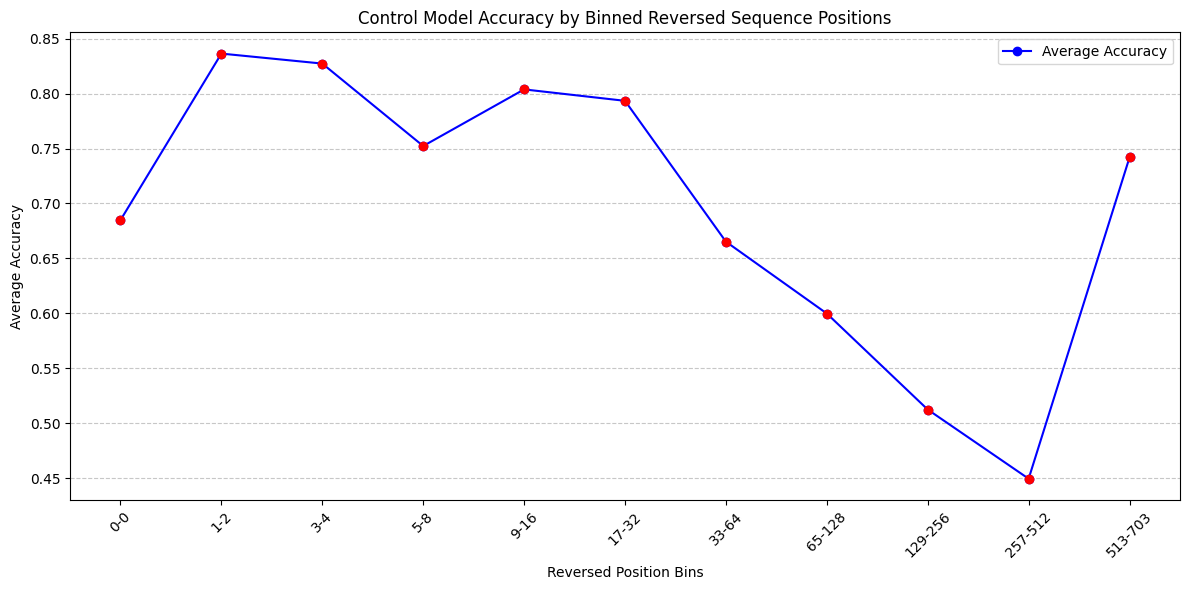

In [ ]:

#Define new bins and labels
bins_reversed = [0, 1, 3, 5, 9, 17, 33, 65, 129, 257, 513, 704]  # Explicit bin edges!
bin_labels_reversed = [f"{bins_reversed[i]}-{bins_reversed[i+1]-1}" for i in range(len(bins_reversed) - 1)]  # Custom labels for bins

#Group reversed positions into bins
reversed_position_bins = pd.cut(reversed_positions_val, bins=bins_reversed, labels=bin_labels_reversed, right=False)

# Check for NaN values in bins
nan_positions_reversed = reversed_positions_val[pd.isnull(reversed_position_bins)]
print(f"Reversed positions with NaN values: {nan_positions_reversed}")
print(f"Total NaN values: {len(nan_positions_reversed)}")

# Initialize a dictionary to hold accuracies for each bin
bin_accuracies_reversed = defaultdict(list)

# Group accuracies into bins
for pos, is_correct, bin_label in zip(reversed_positions_val, correct_predictions1, reversed_position_bins):
    if pd.notnull(bin_label):  # make sure bin label is not NaN
        bin_accuracies_reversed[bin_label].append(is_correct)

#Calculate average accuracy for each bin
avg_accuracy_by_bin_reversed = {bin_label: np.mean(accs) for bin_label, accs in bin_accuracies_reversed.items()}

# Ensure all bins are represented, even if empty
accuracies_sorted_bar_reversed = [avg_accuracy_by_bin_reversed.get(bin_label, 0) for bin_label in bin_labels_reversed]

# Step 4: Plot the results as a line plot
plt.figure(figsize=(12, 6))

# Create a line plot with markers for each bin
plt.plot(bin_labels_reversed, accuracies_sorted_bar_reversed, marker='o', color='blue', label='Average Accuracy')

# Add scatter points for better emphasis
plt.scatter(bin_labels_reversed, accuracies_sorted_bar_reversed, color='red', zorder=5)

plt.xticks(rotation=45)
plt.xlabel('Reversed Position Bins')
plt.ylabel('Average Accuracy')
plt.title('Control Model Accuracy by Binned Reversed Sequence Positions')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

plt.show()


##b) for nonlinear control (dense network with 1 hidden layer)

###i) Accuracy as a function of Sequence Position  

1232/1232 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


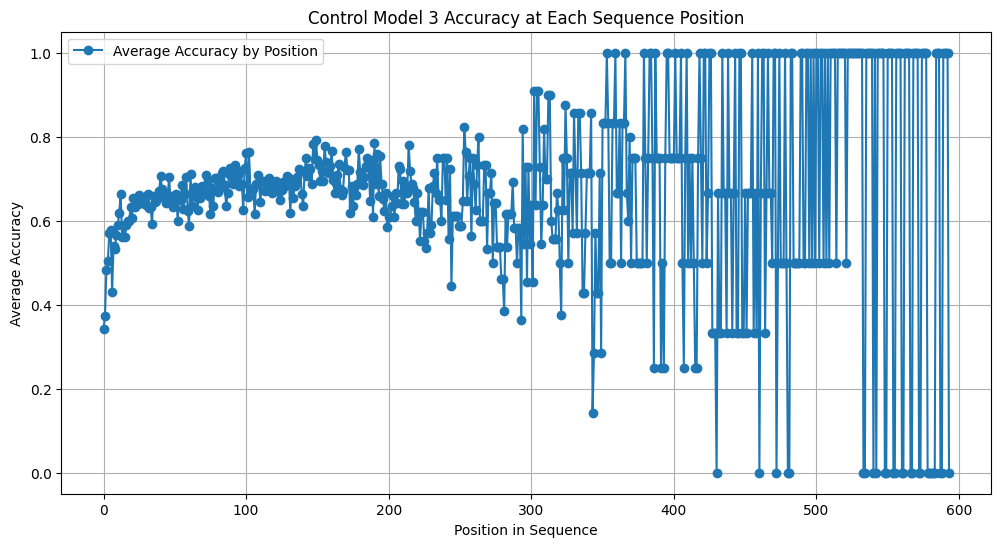

In [ ]:
# Get model predictions
predictions3 = control_model3.predict(Cont_X_val, batch_size=32)  # Predict probabilities
predicted_classes3 = np.argmax(predictions3, axis=1)  # Convert to predicted class labels

# Compare predictions to true values
correct_predictions3 = (predicted_classes3 == Cont_y_val).astype(int)

#padding value (if applicable)
pad_value = 12

# Group accuracies by position
position_accuracies3 = defaultdict(list)
for position, is_correct in zip(positions_val, correct_predictions3):
    position_accuracies3[position].append(is_correct)

# Calculate average accuracy for each position
avg_accuracy_by_position3 = {pos: np.mean(accs) for pos, accs in position_accuracies3.items()}

# Sort positions and accuracies for plotting
positions_sorted3 = sorted(avg_accuracy_by_position3.keys())
accuracies_sorted3 = [avg_accuracy_by_position3[pos] for pos in positions_sorted3]

# Plot accuracy by position
plt.figure(figsize=(12, 6))
plt.plot(positions_sorted3, accuracies_sorted3, marker='o', label='Average Accuracy by Position')
plt.xlabel('Position in Sequence')
plt.ylabel('Average Accuracy')
plt.title('Control Model 3 Accuracy at Each Sequence Position')
plt.grid(True)
plt.legend()
plt.show()

#### Accuracy by Binned Sequence Position

Positions with NaN values: []
Total NaN values: 0


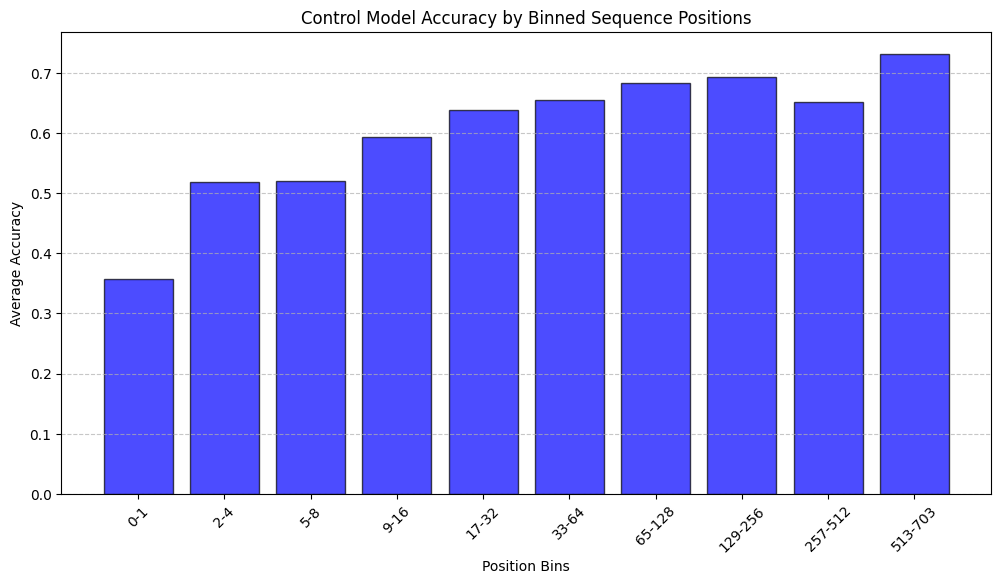

In [ ]:
#Define new bins and labels
bins = [0, 2, 5, 9, 17, 33, 65, 129, 257, 513, 704]  # Explicit bin edges
bin_labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins) - 1)]  # Custom labels for bins

#Group positions by bins
position_bins3 = pd.cut(positions_val, bins=bins, labels=bin_labels, right=False)

# Check for NaN values in bins
nan_positions3 = positions_val[pd.isnull(position_bins3)]
print(f"Positions with NaN values: {nan_positions3}")
print(f"Total NaN values: {len(nan_positions3)}")

# Initialize a dictionary to hold accuracies for each bin
bin_accuracies3 = defaultdict(list)

# Group accuracies into bins
for pos, is_correct, bin_label in zip(positions_val, correct_predictions3, position_bins3):
    if pd.notnull(bin_label):  # Ensure bin label is not NaN
        bin_accuracies3[bin_label].append(is_correct)

# Calculate average accuracy for each bin
avg_accuracy_by_bin3 = {bin_label: np.mean(accs) for bin_label, accs in bin_accuracies3.items()}

# Ensure all bins are represented (even if empty)
accuracies_sorted_bar3 = [avg_accuracy_by_bin3.get(bin_label, 0) for bin_label in bin_labels]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(bin_labels, accuracies_sorted_bar3, color='blue', alpha=0.7, edgecolor='black')
plt.xticks(rotation=45)
plt.xlabel('Position Bins')
plt.ylabel('Average Accuracy')
plt.title('Control Model Accuracy by Binned Sequence Positions')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


###ii) Accuracy as a Function of Reversed Sequence Position

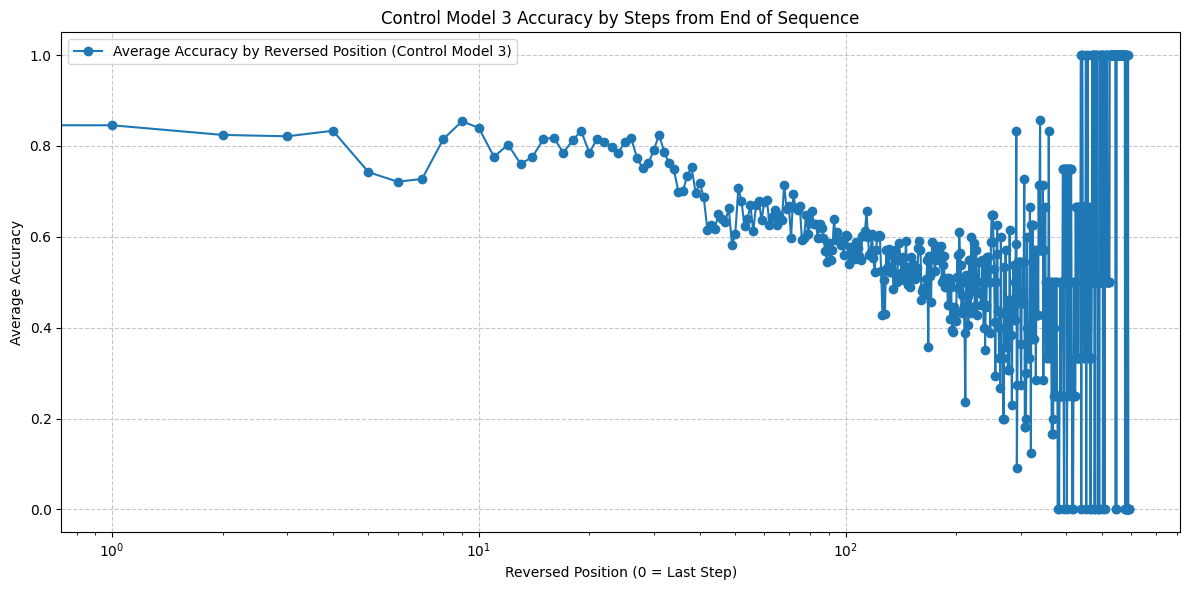

In [ ]:
# Group accuracies by reversed positions
reversed_position_accuracies3 = defaultdict(list)
for position, is_correct in zip(reversed_positions_val, correct_predictions3):
    reversed_position_accuracies3[position].append(is_correct)

# Calculate average accuracy for each reversed position
avg_accuracy_by_reversed_position3 = {
    pos: np.mean(accs) for pos, accs in reversed_position_accuracies3.items()
}

# Sort reversed positions and accuracies for plotting
positions_sorted_reversed3 = sorted(avg_accuracy_by_reversed_position3.keys())
accuracies_sorted_reversed3 = [
    avg_accuracy_by_reversed_position3[pos] for pos in positions_sorted_reversed3
]

# Plot accuracy by reversed position (log scale for x-axis)
plt.figure(figsize=(12, 6))
plt.plot(
    positions_sorted_reversed3,
    accuracies_sorted_reversed3,
    marker="o",
    label="Average Accuracy by Reversed Position (Control Model 3)",
)
plt.xlabel("Reversed Position (0 = Last Step)")
plt.ylabel("Average Accuracy")
plt.title("Control Model 3 Accuracy by Steps from End of Sequence")
plt.xscale("log")  # Set x-axis to logarithmic scale
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


1232/1232 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


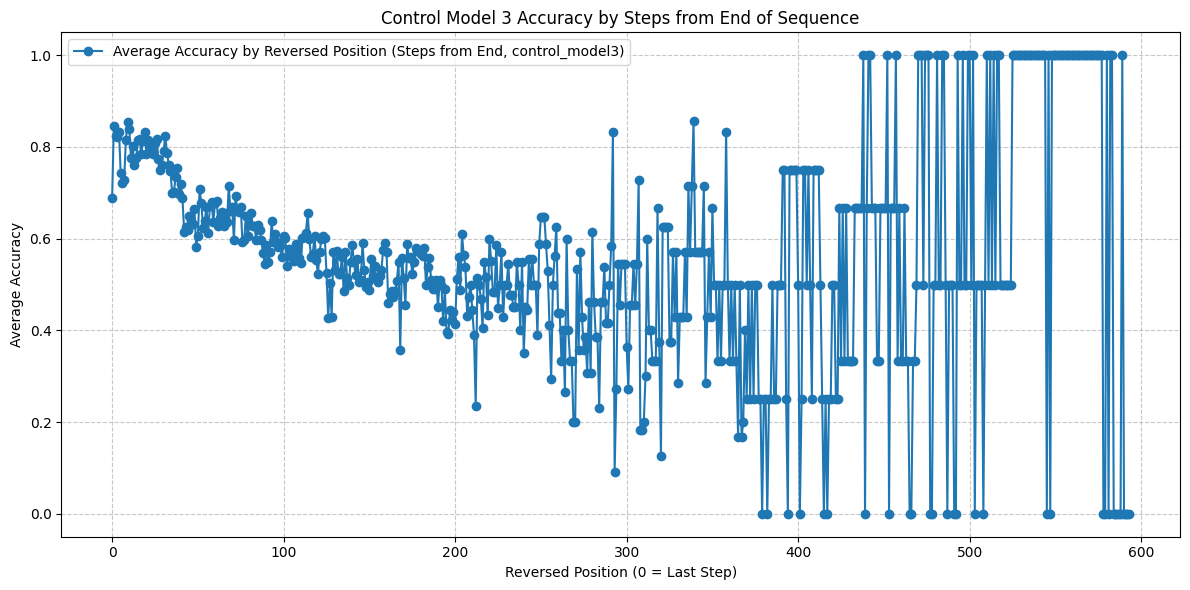

Reversed positions with NaN values: []
Total NaN values: 0


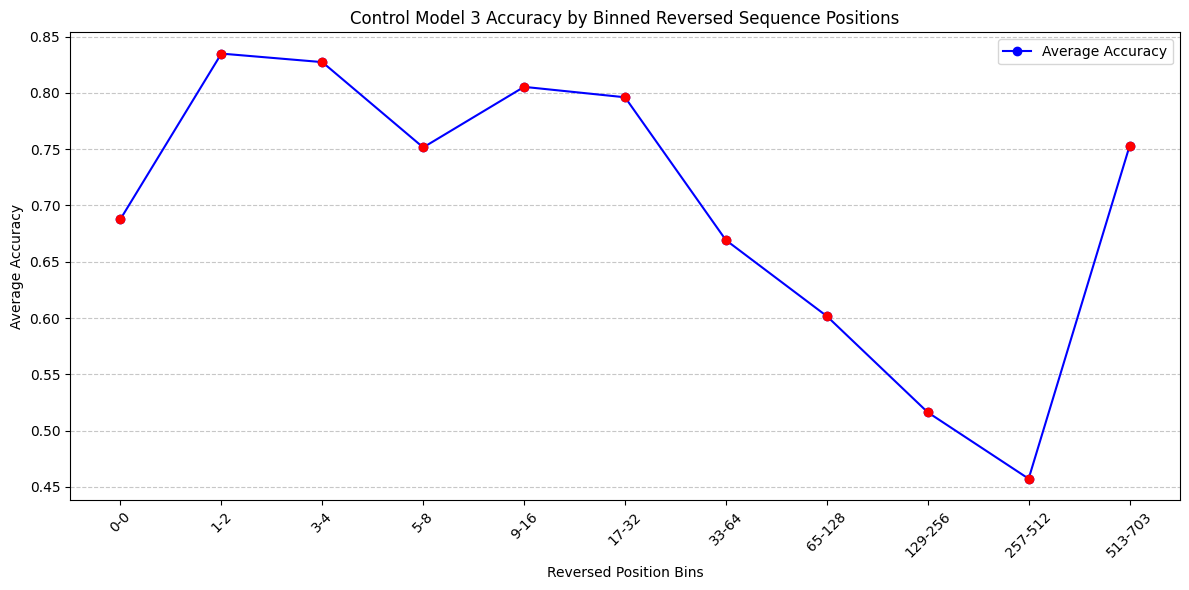

In [ ]:
#Predict for the validation set
# Predict probabilities for validation data
predictions3 = control_model3.predict(Cont_X_val, batch_size=32)

# Get predicted classes (action with the highest probability)
predicted_classes3 = np.argmax(predictions3, axis=1)

# Compare predictions to true values
correct_predictions3 = (predicted_classes3 == Cont_y_val).astype(int)

#Group accuracies by reversed positions
reversed_position_accuracies3 = defaultdict(list)

# Group accuracies into bins by reversed positions
for position, is_correct in zip(reversed_positions_val, correct_predictions3):
    reversed_position_accuracies3[position].append(is_correct)

# Calculate average accuracy for each reversed position
avg_accuracy_by_reversed_position3 = {
    pos: np.mean(accs) for pos, accs in reversed_position_accuracies3.items()
}

# Sort the reversed positions in ascending order
positions_sorted_reversed3 = sorted(avg_accuracy_by_reversed_position3.keys())
accuracies_sorted_reversed3 = [
    avg_accuracy_by_reversed_position3[pos] for pos in positions_sorted_reversed3
]

# Plot accuracy by reversed position
plt.figure(figsize=(12, 6))
plt.plot(
    positions_sorted_reversed3,
    accuracies_sorted_reversed3,
    marker="o",
    label="Average Accuracy by Reversed Position (Steps from End, control_model3)",
)
plt.xlabel("Reversed Position (0 = Last Step)")
plt.ylabel("Average Accuracy")
plt.title("Control Model 3 Accuracy by Steps from End of Sequence")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()



#Define bins for reversed positions
bins_reversed = [0, 1, 3, 5, 9, 17, 33, 65, 129, 257, 513, 704]  # Explicit bin edges
bin_labels_reversed = [f"{bins_reversed[i]}-{bins_reversed[i+1]-1}" for i in range(len(bins_reversed) - 1)]  # Custom labels

# Group reversed positions into bins
reversed_position_bins3 = pd.cut(reversed_positions_val, bins=bins_reversed, labels=bin_labels_reversed, right=False)

# Check for NaN values in bins
nan_positions_reversed3 = reversed_positions_val[pd.isnull(reversed_position_bins3)]
print(f"Reversed positions with NaN values: {nan_positions_reversed3}")
print(f"Total NaN values: {len(nan_positions_reversed3)}")

#Calculate accuracy for each bin
bin_accuracies_reversed3 = defaultdict(list)

# Group accuracies into bins
for pos, is_correct, bin_label in zip(reversed_positions_val, correct_predictions3, reversed_position_bins3):
    if pd.notnull(bin_label):  # Ensure bin label is valid
        bin_accuracies_reversed3[bin_label].append(is_correct)

# Calculate average accuracy for each bin
avg_accuracy_by_bin_reversed3 = {bin_label: np.mean(accs) for bin_label, accs in bin_accuracies_reversed3.items()}

# Ensure all bins are represented (even if empty)
accuracies_sorted_bar_reversed3 = [avg_accuracy_by_bin_reversed3.get(bin_label, 0) for bin_label in bin_labels_reversed]

#Plot binned accuracy by reversed position
plt.figure(figsize=(12, 6))

# Create a line plot with markers for each bin
plt.plot(bin_labels_reversed, accuracies_sorted_bar_reversed3, marker='o', color='blue', label='Average Accuracy')

# Add scatter points for better emphasis
plt.scatter(bin_labels_reversed, accuracies_sorted_bar_reversed3, color='red', zorder=5)

# Formatting
plt.xticks(rotation=45)
plt.xlabel('Reversed Position Bins')
plt.ylabel('Average Accuracy')
plt.title('Control Model 3 Accuracy by Binned Reversed Sequence Positions')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Plot
plt.show()


##c) for RNN

###i) Accuracy as a function of Sequence Position

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step


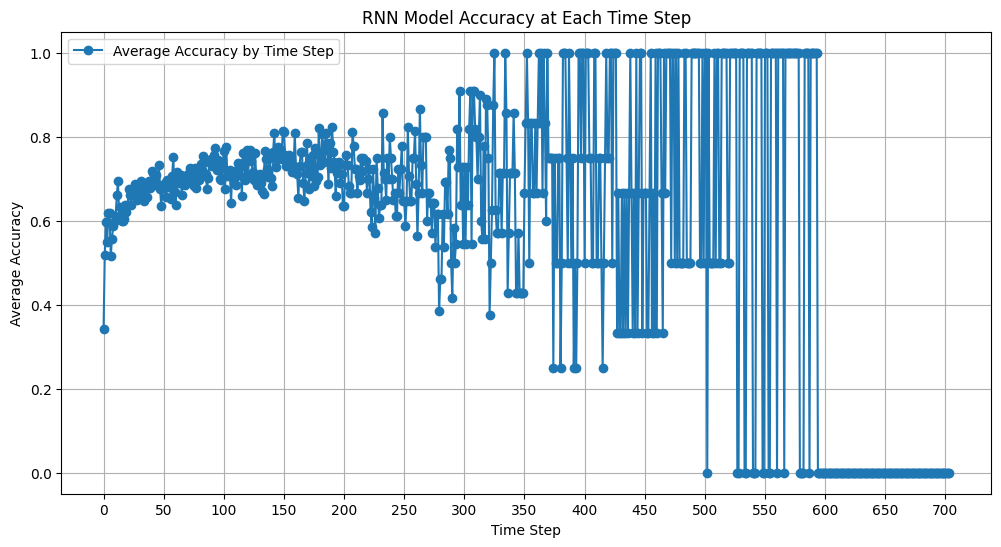

In [ ]:
# Get model predictions
y_pred_proba = RNN1.predict(RNN_sequence_val)  # Predictions in probability format
y_pred = np.argmax(y_pred_proba, axis=-1)  # Convert to predicted class labels

# Convert true labels to array
y_true = np.array(RNN_target_val)  # Shape: (num_sequences, max_sequence_length)

# Defined previously as 12
pad_value = 12

# Create a mask to ignore padding in targets
mask = y_true != pad_value  # Shape: (num_sequences, max_sequence_length)

# Calculate element-wise correctness for predictions
correct_predictions2 = (y_true == y_pred).astype(np.float32)  # Shape: (num_sequences, max_sequence_length)

# Apply the mask to exclude padded elements
correct_predictions2 *= mask

# Calculate the number of valid sequences at each time step (exclude padding)
valid_counts = np.sum(mask, axis=0)  # Shape: (max_sequence_length,)

# Calculate average accuracy at each time step
time_step_accuracies = np.sum(correct_predictions2, axis=0) / (valid_counts + np.finfo(float).eps)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(range(len(time_step_accuracies)), time_step_accuracies, marker='o', label='Average Accuracy by Time Step')
plt.xlabel('Time Step')
plt.ylabel('Average Accuracy')
plt.title('RNN Model Accuracy at Each Time Step')
plt.xticks(np.arange(0, len(time_step_accuracies), step=50))
plt.grid(True)
plt.legend()
plt.show()

#### Log Scale Version of Accuracy as a function of Sequence Position  

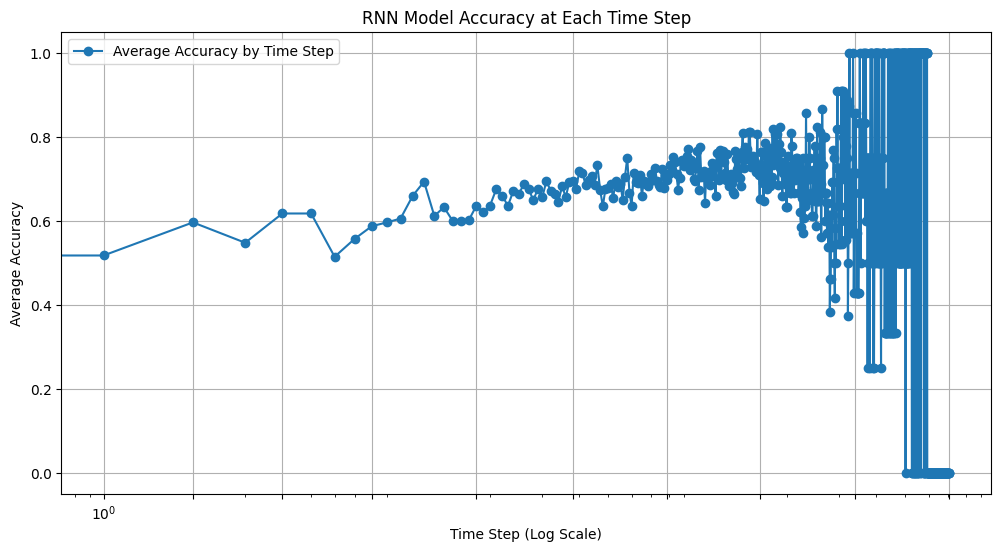

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(time_step_accuracies)), time_step_accuracies, marker='o', label='Average Accuracy by Time Step')
plt.xlabel('Time Step (Log Scale)')
plt.ylabel('Average Accuracy')
plt.title('RNN Model Accuracy at Each Time Step')
plt.xscale('log')  # Apply logarithmic scale to the x-axis
plt.xticks(np.logspace(0, np.log10(len(time_step_accuracies)), num=10, dtype=int))  # Logarithmic ticks
plt.grid(True)
plt.legend()
plt.show()

####Accuracy by Sequence Length

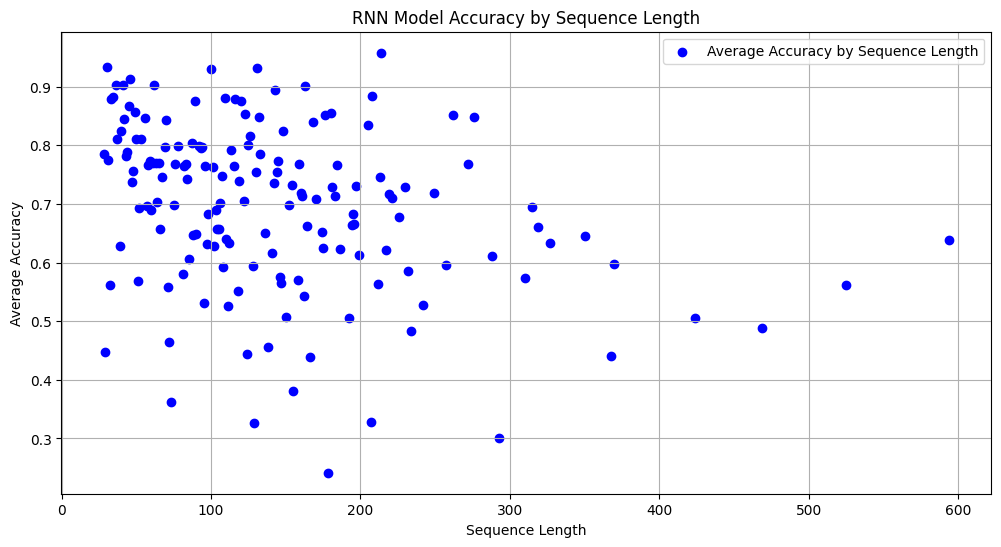

In [ ]:
# Calculate sequence lengths (number of non-padded steps per sequence)
sequence_lengths = np.sum(mask, axis=1)  # Shape: (num_sequences,)

# Calculate total correct predictions per sequence
correct_per_sequence = np.sum(correct_predictions2, axis=1)  # Shape: (num_sequences,)

# Calculate accuracy for each sequence
sequence_accuracies = correct_per_sequence / (sequence_lengths + np.finfo(float).eps)  # Shape: (num_sequences,)

# Group sequences by their lengths and compute average accuracy
accuracy_by_length = defaultdict(list)

for length, accuracy in zip(sequence_lengths, sequence_accuracies):
    accuracy_by_length[length].append(accuracy)

# Calculate average accuracy for each length
avg_accuracy_by_length = {length: np.mean(accs) for length, accs in accuracy_by_length.items()}

# Sort lengths and corresponding accuracies for plotting
lengths_sorted2 = sorted(avg_accuracy_by_length.keys())
accuracies_sorted2 = [avg_accuracy_by_length[length] for length in lengths_sorted2]

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(lengths_sorted2, accuracies_sorted2, color='blue', label='Average Accuracy by Sequence Length')
plt.xlabel('Sequence Length')
plt.ylabel('Average Accuracy')
plt.title('RNN Model Accuracy by Sequence Length')
plt.grid(True)
plt.legend()
plt.show()

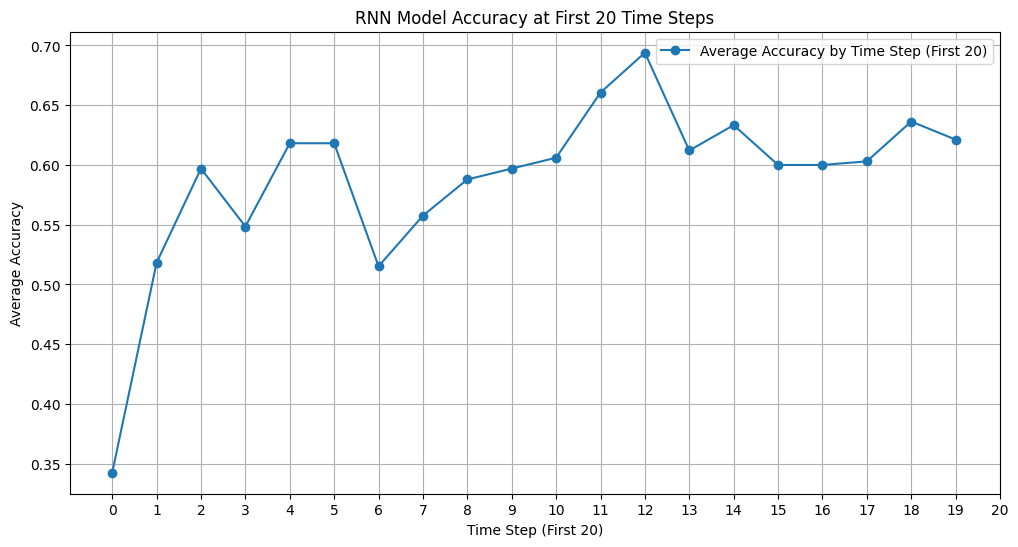

In [ ]:
# Slice to include only the first 20 positions
time_step_accuracies_first_20 = time_step_accuracies[:20]

# Plot the results for the first 20 positions
plt.figure(figsize=(12, 6))
plt.plot(range(len(time_step_accuracies_first_20)), time_step_accuracies_first_20, marker='o', label='Average Accuracy by Time Step (First 20)')
plt.xticks(range(21))  # Show ticks explicitly from 0 to 20
plt.xlabel('Time Step (First 20)')
plt.ylabel('Average Accuracy')
plt.title('RNN Model Accuracy at First 20 Time Steps')
plt.grid(True)
plt.legend()
plt.show()


####Accuracy as a Function of Binned Sequence Position

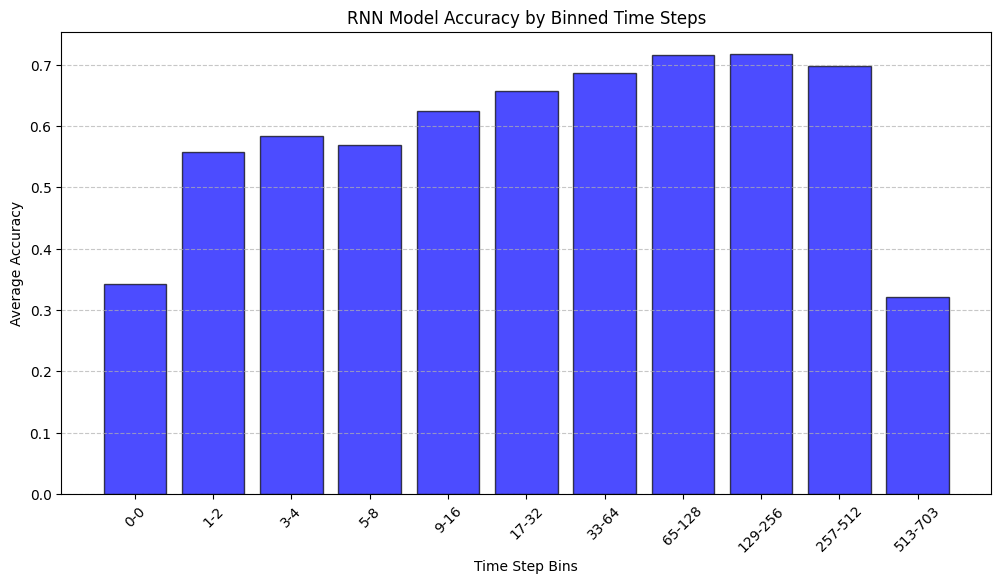

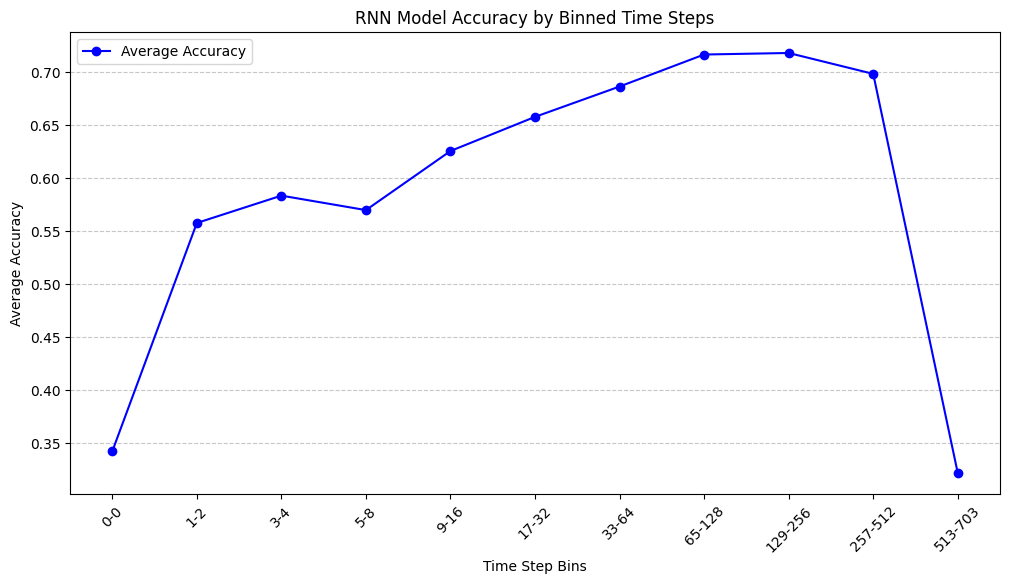

In [ ]:
#Define explicit bins and labels
bins2 = [0, 1, 3, 5, 9, 17, 33, 65, 129, 257, 513, 704]  # Explicit bin edges
bin_labels2 = [f"{bins2[i]}-{bins2[i+1]-1}" for i in range(len(bins2) - 1)]  # Bin labels

#Group time steps into bins
time_step_bins2 = pd.cut(range(len(time_step_accuracies)), bins=bins2, labels=bin_labels2, right=False)

# Initialize a dictionary to hold accuracies for each bin
bin_accuracies2 = defaultdict(list)

# Group accuracies into bins
for step, accuracy, bin_label in zip(range(len(time_step_accuracies)), time_step_accuracies, time_step_bins2):
    if pd.notnull(bin_label):  # Ensure bin label is not NaN
        bin_accuracies2[bin_label].append(accuracy)

#Calculate average accuracy for each bin
avg_accuracy_by_bin2 = {bin_label: np.mean(accs) for bin_label, accs in bin_accuracies2.items()}

# Extract sorted bins and their average accuracies
bins_sorted2 = [bin_label for bin_label in bin_labels2 if bin_label in avg_accuracy_by_bin2]
accuracies_sorted2 = [avg_accuracy_by_bin2[bin_label] for bin_label in bins_sorted2]

#Plot the results
plt.figure(figsize=(12, 6))
plt.bar(bins_sorted2, accuracies_sorted2, color='blue', alpha=0.7, edgecolor='black')
plt.xticks(rotation=45)
plt.xlabel('Time Step Bins')
plt.ylabel('Average Accuracy')
plt.title('RNN Model Accuracy by Binned Time Steps')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Plot the results as a line plot
plt.figure(figsize=(12, 6))
plt.plot(bins_sorted2, accuracies_sorted2, marker='o', linestyle='-', color='blue', label='Average Accuracy')
plt.xticks(rotation=45)
plt.xlabel('Time Step Bins')
plt.ylabel('Average Accuracy')
plt.title('RNN Model Accuracy by Binned Time Steps')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

####Accuracy as a function of Sequence Position (Players with ≥100 Actions)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step


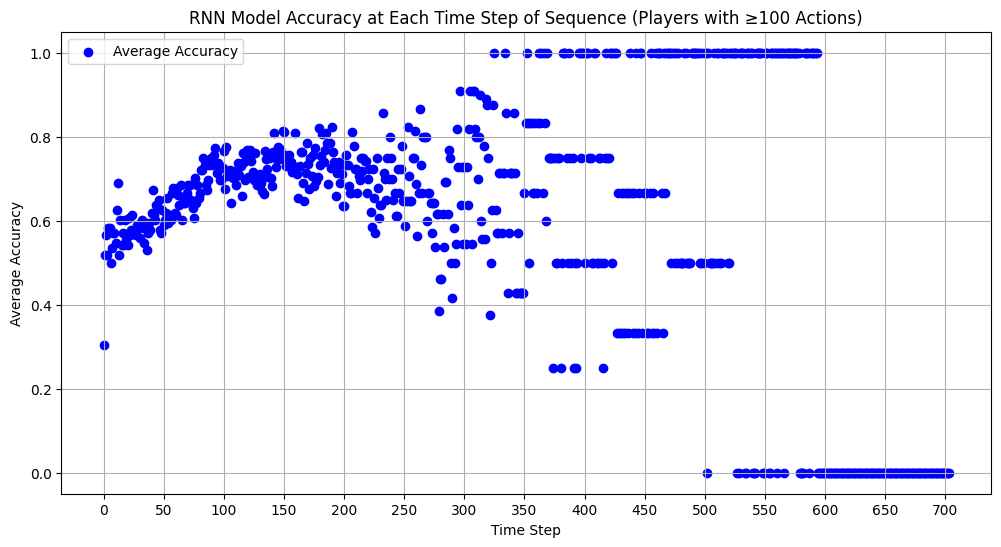

In [ ]:
# Get model predictions
y_pred_proba = RNN1.predict(RNN_sequence_val)  # Predictions in probability format
y_pred = np.argmax(y_pred_proba, axis=-1)  # Convert to predicted class labels

# Convert true labels to array
y_true = np.array(RNN_target_val)  # Shape: (num_sequences, max_sequence_length)

# Define the padding value
pad_value = 12

# Create a mask to ignore padding in targets
mask = y_true != pad_value  # Shape: (num_sequences, max_sequence_length)

# Calculate sequence lengths for each player
sequence_lengths = np.sum(mask, axis=1)  # Shape: (num_sequences,)

# Filter players with at least 100 actions
valid_players_mask = sequence_lengths >= 100
filtered_y_true = y_true[valid_players_mask]
filtered_y_pred = y_pred[valid_players_mask]
filtered_mask = mask[valid_players_mask]

# Recalculate correctness for filtered players
filtered_correct_predictions = (filtered_y_true == filtered_y_pred).astype(np.float32)  # Shape: (filtered_num_sequences, max_sequence_length)
filtered_correct_predictions *= filtered_mask

# Calculate the number of valid sequences at each time step (exclude padding)
valid_counts = np.sum(filtered_mask, axis=0)  # Shape: (max_sequence_length,)

# Calculate average accuracy at each time step
time_step_accuracies = np.sum(filtered_correct_predictions, axis=0) / (valid_counts + np.finfo(float).eps)


# Scatter plot for filtered players
plt.figure(figsize=(12, 6))
plt.scatter(range(len(time_step_accuracies)), time_step_accuracies, c='blue', label='Average Accuracy')
plt.xlabel('Time Step')
plt.ylabel('Average Accuracy')
plt.title('RNN Model Accuracy at Each Time Step of Sequence (Players with ≥100 Actions)')
plt.xticks(np.arange(0, len(time_step_accuracies), step=50))
plt.grid(True)
plt.legend()
plt.show()


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step


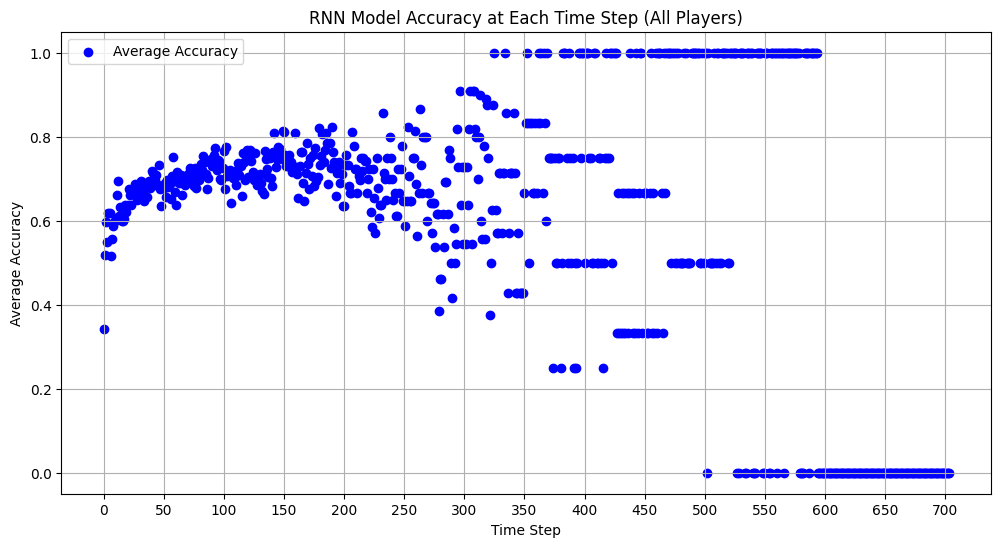

In [ ]:
# Get model predictions
y_pred_proba = RNN1.predict(RNN_sequence_val)  # Predictions in probability format
y_pred = np.argmax(y_pred_proba, axis=-1)  # Convert to predicted class labels

# Convert true labels to array
y_true = np.array(RNN_target_val)  # Shape: (num_sequences, max_sequence_length)

# Define the padding value
pad_value = 12

# Create a mask to ignore padding in targets
mask = y_true != pad_value  # Shape: (num_sequences, max_sequence_length)

# Calculate element-wise correctness for predictions
correct_predictions = (y_true == y_pred).astype(np.float32)  # Shape: (num_sequences, max_sequence_length)

# Apply the mask to exclude padded elements
correct_predictions *= mask

# Calculate the number of valid sequences at each time step (exclude padding)
valid_counts = np.sum(mask, axis=0)  # Shape: (max_sequence_length,)

# Calculate average accuracy at each time step
time_step_accuracies = np.sum(correct_predictions, axis=0) / (valid_counts + np.finfo(float).eps)

# Scatter plot for all players
plt.figure(figsize=(12, 6))
plt.scatter(range(len(time_step_accuracies)), time_step_accuracies, c='blue', label='Average Accuracy')
plt.xlabel('Time Step')
plt.ylabel('Average Accuracy')
plt.title('RNN Model Accuracy at Each Time Step (All Players)')
plt.xticks(np.arange(0, len(time_step_accuracies), step=50))
plt.grid(True)
plt.legend()
plt.show()


###ii) Accuracy as a function of Reversed Sequence Position

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step


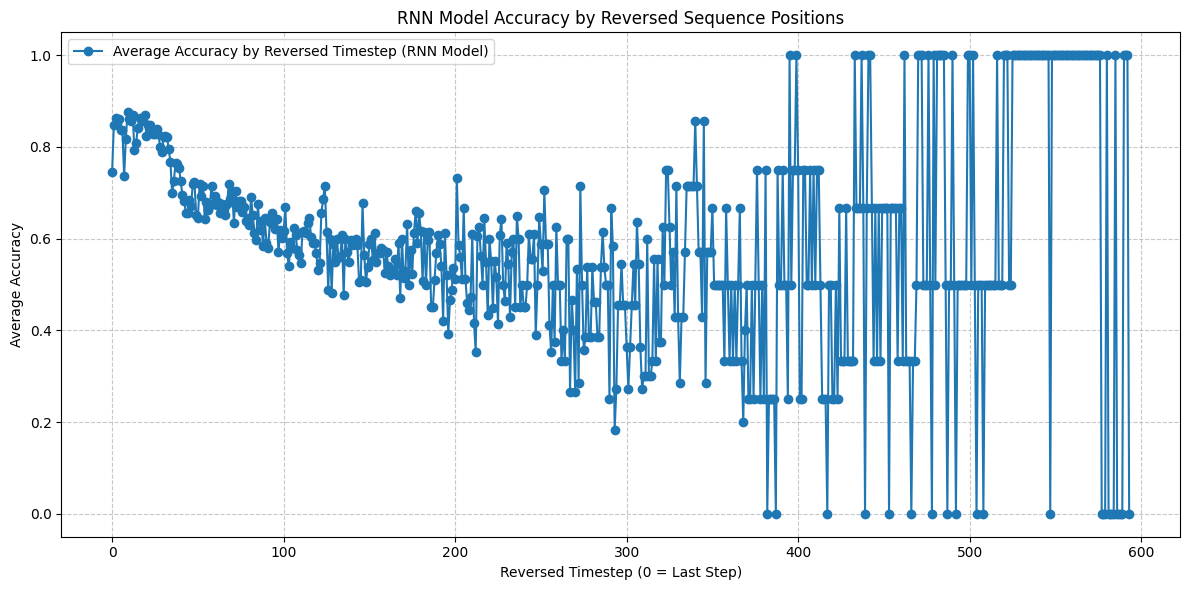

In [ ]:
# Get model predictions
y_pred_proba = RNN1.predict(RNN_sequence_val)  # Predictions in probability format
y_pred = np.argmax(y_pred_proba, axis=-1)  # Convert to predicted class labels

# Convert true labels to array
y_true = np.array(RNN_target_val)  # Shape: (num_sequences, max_sequence_length)

# Define the padding value
pad_value = 12

# Create a mask to ignore padding in targets
mask = y_true != pad_value  # Shape: (num_sequences, max_sequence_length)

# Calculate element-wise correctness for predictions
correct_predictions2 = (y_true == y_pred).astype(np.float32)  # Shape: (num_sequences, max_sequence_length)

# Apply the mask to exclude padded elements
correct_predictions2 *= mask

# Determine the actual lengths of each sequence (exclude padded values)
sequence_lengths = np.sum(mask, axis=1)  # Shape: (num_sequences,)

# Initialize arrays for reversed positions and flattened correctness
reversed_positions = []
correct_predictions_flat = []

# Calculate reversed positions and collect valid correctness
for seq_len, correct_seq in zip(sequence_lengths, correct_predictions2):
    valid_correct = correct_seq[:seq_len]  # Exclude padded values
    correct_predictions_flat.extend(valid_correct)
    reversed_positions.extend(reversed(range(seq_len)))  # Reverse positions based on valid lengths

# Initialize a dictionary to hold accuracies by reversed timestep
reversed_position_accuracies = defaultdict(list)

# Group accuracies by reversed positions
for position, is_correct in zip(reversed_positions, correct_predictions_flat):
    reversed_position_accuracies[position].append(is_correct)

# Calculate average accuracy for each reversed position
avg_accuracy_by_reversed_position = {
    pos: np.mean(accs) for pos, accs in reversed_position_accuracies.items()
}

# Sort the reversed positions in ascending order
positions_sorted_reversed = sorted(avg_accuracy_by_reversed_position.keys())
accuracies_sorted_reversed = [
    avg_accuracy_by_reversed_position[pos] for pos in positions_sorted_reversed
]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(
    positions_sorted_reversed,
    accuracies_sorted_reversed,
    marker="o",
    label="Average Accuracy by Reversed Timestep (RNN Model)",
)
plt.xlabel("Reversed Timestep (0 = Last Step)")
plt.ylabel("Average Accuracy")
plt.title("RNN Model Accuracy by Reversed Sequence Positions")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


####Log Scale Version of Accuracy as a function of Reversed Sequence Position

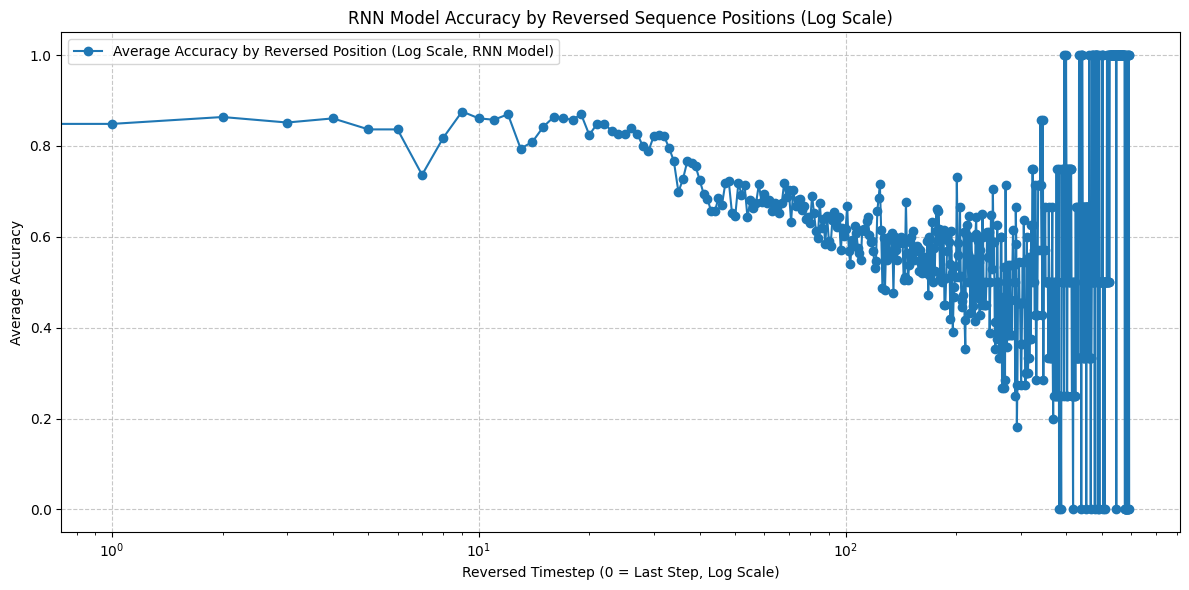

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Plot the results with a logarithmic x-axis
plt.figure(figsize=(12, 6))
plt.plot(
    positions_sorted_reversed,
    accuracies_sorted_reversed,
    marker="o",
    label="Average Accuracy by Reversed Position (Log Scale, RNN Model)",
)
plt.xscale("log")  # Set x-axis to logarithmic scale
plt.xlabel("Reversed Timestep (0 = Last Step, Log Scale)")
plt.ylabel("Average Accuracy")
plt.title("RNN Model Accuracy by Reversed Sequence Positions (Log Scale)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


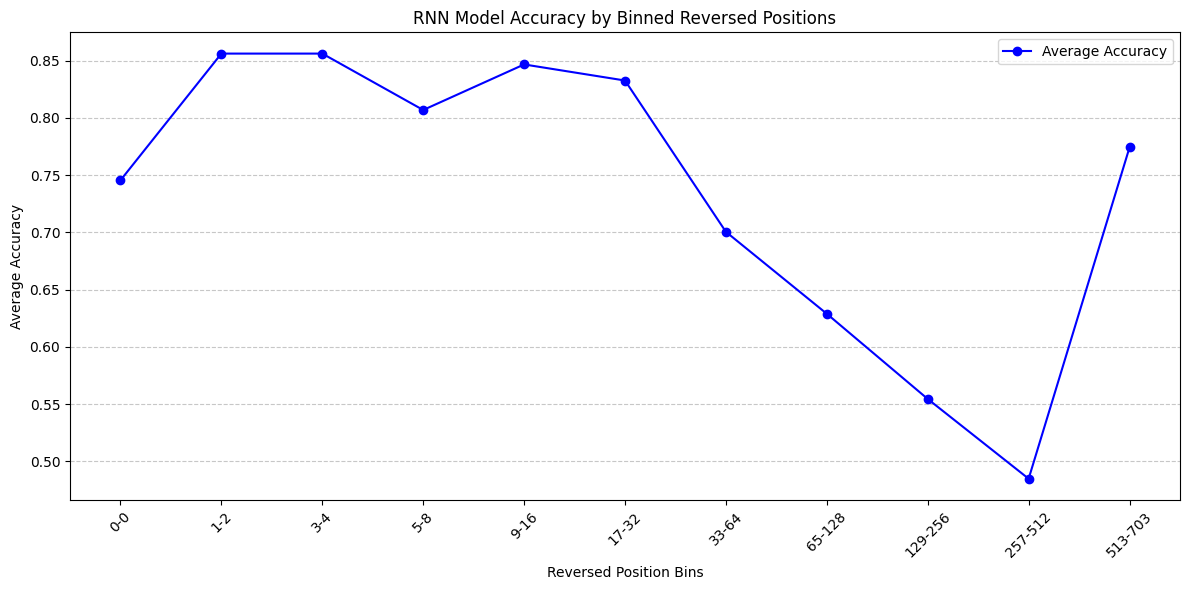

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict

# Step 1: Define explicit bins and labels for reversed positions
bins_reversed2 = [0, 1, 3, 5, 9, 17, 33, 65, 129, 257, 513, 704]  # Explicit bin edges
bin_labels_reversed2 = [f"{bins_reversed2[i]}-{bins_reversed2[i+1]-1}" for i in range(len(bins_reversed2) - 1)]  # Bin labels

# Step 2: Group reversed positions into bins
reversed_position_bins2 = pd.cut(reversed_positions, bins=bins_reversed2, labels=bin_labels_reversed2, right=False)

# Initialize a dictionary to hold accuracies for each bin
bin_accuracies_reversed2 = defaultdict(list)

# Group accuracies into bins
for position, is_correct, bin_label in zip(reversed_positions, correct_predictions_flat, reversed_position_bins2):
    if pd.notnull(bin_label):  # Ensure bin label is not NaN
        bin_accuracies_reversed2[bin_label].append(is_correct)

# Step 3: Calculate average accuracy for each bin
avg_accuracy_by_bin_reversed2 = {bin_label: np.mean(accs) for bin_label, accs in bin_accuracies_reversed2.items()}

# Extract sorted bins and their average accuracies
bins_sorted_reversed2 = [bin_label for bin_label in bin_labels_reversed2 if bin_label in avg_accuracy_by_bin_reversed2]
accuracies_sorted_reversed2 = [avg_accuracy_by_bin_reversed2[bin_label] for bin_label in bins_sorted_reversed2]

# Step 4: Plot the results as a line plot
plt.figure(figsize=(12, 6))
plt.plot(bins_sorted_reversed2, accuracies_sorted_reversed2, marker='o', linestyle='-', color='blue', label='Average Accuracy')
plt.xticks(rotation=45)
plt.xlabel('Reversed Position Bins')
plt.ylabel('Average Accuracy')
plt.title('RNN Model Accuracy by Binned Reversed Positions')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


1232/1232 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


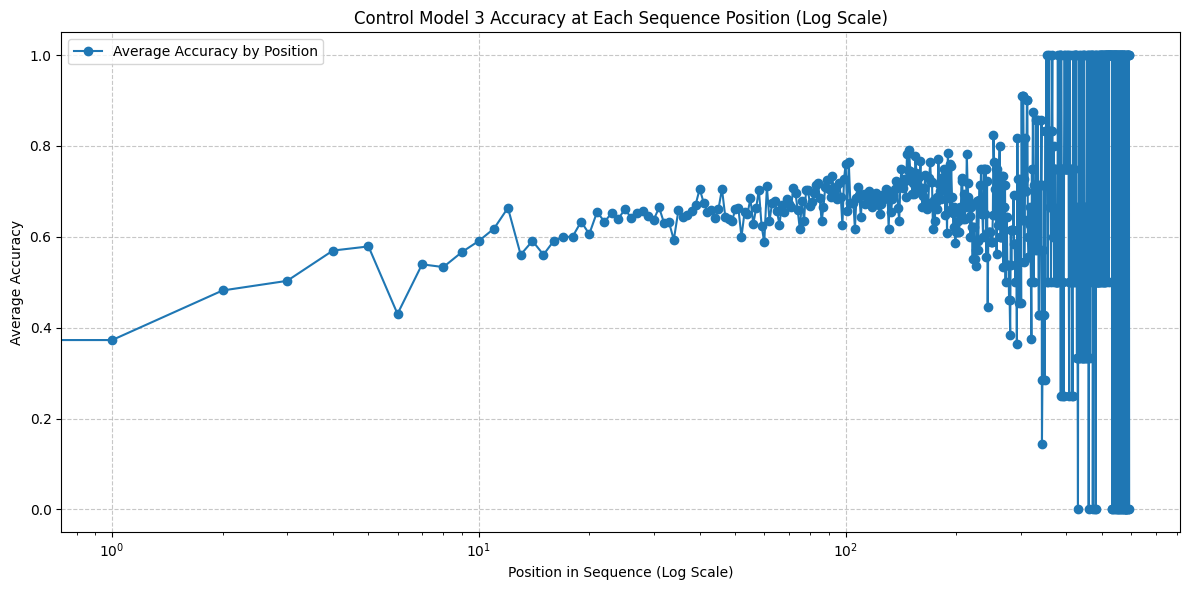

Positions with NaN values: []
Total NaN values: 0


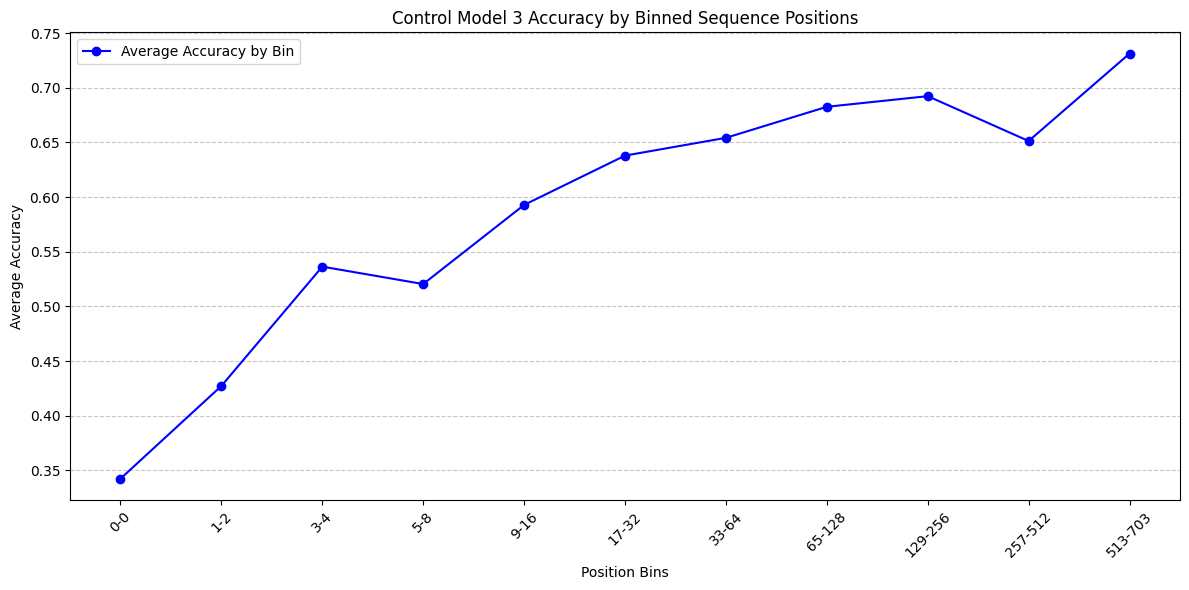

In [ ]:
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Step 1: Compute accuracy by position for control_model3
# Predict probabilities for validation data
predictions3 = control_model3.predict(Cont_X_val, batch_size=32)

# Get predicted classes (action with the highest probability)
predicted_classes3 = np.argmax(predictions3, axis=1)

# Compare predictions to true values
correct_predictions3 = (predicted_classes3 == Cont_y_val).astype(int)

# Step 2: Group by position and compute average accuracy
position_accuracies3 = defaultdict(list)

for position, is_correct in zip(positions_val, correct_predictions3):
    position_accuracies3[position].append(is_correct)

# Calculate average accuracy for each position
avg_accuracy_by_position3 = {pos: np.mean(accs) for pos, accs in position_accuracies3.items()}

# Sort positions for plotting
positions_sorted3 = sorted(avg_accuracy_by_position3.keys())
accuracies_sorted3 = [avg_accuracy_by_position3[pos] for pos in positions_sorted3]

# Step 3: Plot accuracy by position
plt.figure(figsize=(12, 6))
plt.plot(positions_sorted3, accuracies_sorted3, marker='o', label='Average Accuracy by Position')
plt.xscale("log")  # Logarithmic x-axis
plt.xlabel('Position in Sequence (Log Scale)')
plt.ylabel('Average Accuracy')
plt.title('Control Model 3 Accuracy at Each Sequence Position (Log Scale)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# Step 4: Define new bins and labels for grouped analysis
bins = [0, 1, 3, 5, 9, 17, 33, 65, 129, 257, 513, 704]  # Explicit bin edges
bin_labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins) - 1)]  # Custom bin labels

# Group positions into bins
position_bins3 = pd.cut(positions_val, bins=bins, labels=bin_labels, right=False)

# Check for NaN values in bins
nan_positions3 = positions_val[pd.isnull(position_bins3)]
print(f"Positions with NaN values: {nan_positions3}")
print(f"Total NaN values: {len(nan_positions3)}")

# Initialize a dictionary to hold accuracies for each bin
bin_accuracies3 = defaultdict(list)

# Group accuracies into bins
for pos, is_correct, bin_label in zip(positions_val, correct_predictions3, position_bins3):
    if pd.notnull(bin_label):  # Ensure bin label is valid
        bin_accuracies3[bin_label].append(is_correct)

# Step 5: Calculate average accuracy for each bin
avg_accuracy_by_bin3 = {bin_label: np.mean(accs) for bin_label, accs in bin_accuracies3.items()}

# Ensure all bins are represented, even if empty
accuracies_sorted_bar3 = [avg_accuracy_by_bin3.get(bin_label, 0) for bin_label in bin_labels]
# Step 6: Line plot of average accuracy by bin
plt.figure(figsize=(12, 6))
plt.plot(bin_labels, accuracies_sorted_bar3, marker='o', linestyle='-', color='blue', label='Average Accuracy by Bin')
plt.xlabel('Position Bins')
plt.ylabel('Average Accuracy')
plt.title('Control Model 3 Accuracy by Binned Sequence Positions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()



##e) Sequence Tracking Comparison

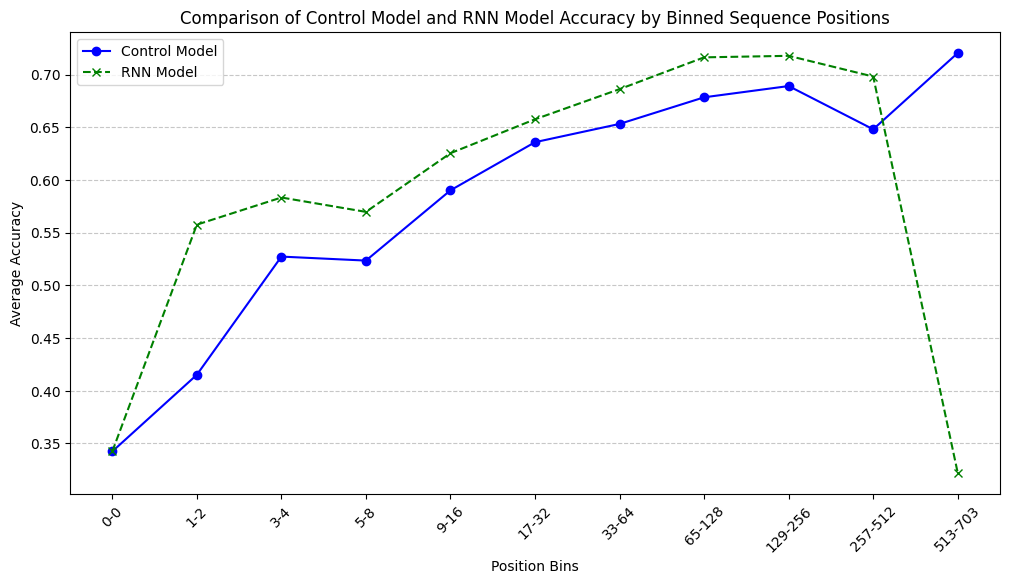

In [ ]:
#Define explicit bins and labels
bins = [0, 1, 3, 5, 9, 17, 33, 65, 129, 257, 513, 704]
bin_labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins) - 1)]

#Compute binned averages for Control Model
position_bins1 = pd.cut(positions_val, bins=bins, labels=bin_labels, right=False)
bin_accuracies1 = defaultdict(list)
for pos, is_correct, bin_label in zip(positions_val, correct_predictions1, position_bins1):
    if pd.notnull(bin_label):
        bin_accuracies1[bin_label].append(is_correct)
avg_accuracy_by_bin1 = {bin_label: np.mean(accs) for bin_label, accs in bin_accuracies1.items()}
accuracies_sorted1 = [avg_accuracy_by_bin1.get(bin_label, 0) for bin_label in bin_labels]

# Compute binned averages for RNN Model
time_step_bins2 = pd.cut(range(len(time_step_accuracies)), bins=bins, labels=bin_labels, right=False)
bin_accuracies2 = defaultdict(list)
for step, accuracy, bin_label in zip(range(len(time_step_accuracies)), time_step_accuracies, time_step_bins2):
    if pd.notnull(bin_label):
        bin_accuracies2[bin_label].append(accuracy)
avg_accuracy_by_bin2 = {bin_label: np.mean(accs) for bin_label, accs in bin_accuracies2.items()}
accuracies_sorted2 = [avg_accuracy_by_bin2.get(bin_label, 0) for bin_label in bin_labels]

# Plot both results on the same figure
plt.figure(figsize=(12, 6))

# Plot for Control Model
plt.plot(bin_labels, accuracies_sorted1, marker='o', linestyle='-', color='blue', label='Control Model')

# Plot for RNN Model
plt.plot(bin_labels, accuracies_sorted2, marker='x', linestyle='--', color='green', label='RNN Model')

plt.xticks(rotation=45)
plt.xlabel('Position Bins')
plt.ylabel('Average Accuracy')
plt.title('Comparison of Control Model and RNN Model Accuracy by Binned Sequence Positions')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


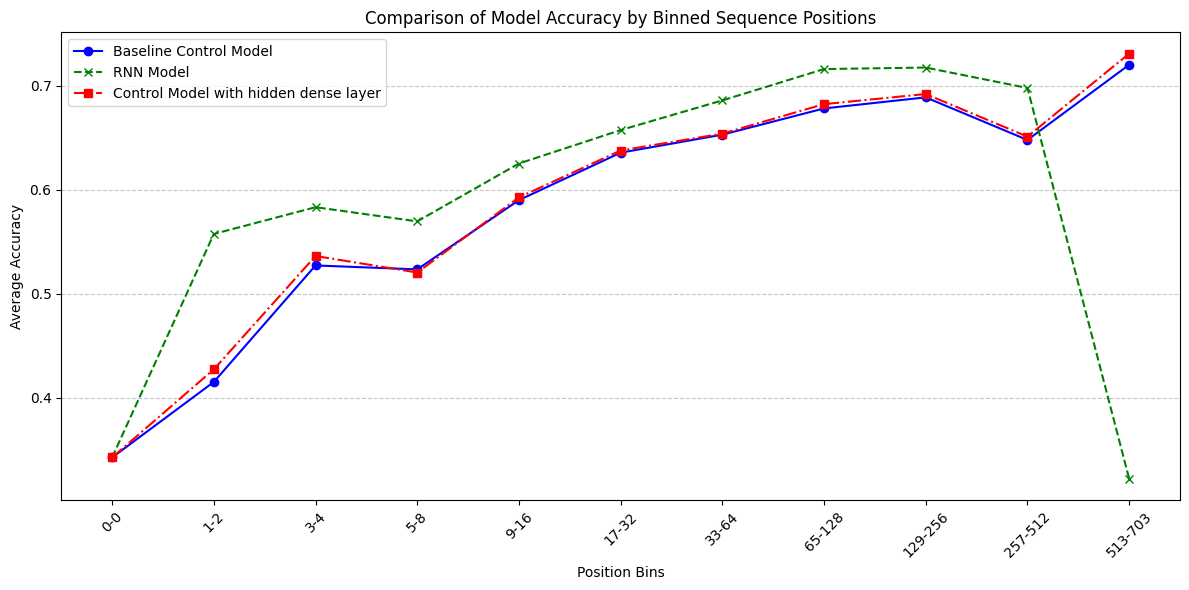

In [ ]:
# Define explicit bins and labels
bins = [0, 1, 3, 5, 9, 17, 33, 65, 129, 257, 513, 704]
bin_labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins) - 1)]

# Compute binned averages for Control Model (GLM)
position_bins1 = pd.cut(positions_val, bins=bins, labels=bin_labels, right=False)
bin_accuracies1 = defaultdict(list)
for pos, is_correct, bin_label in zip(positions_val, correct_predictions1, position_bins1):
    if pd.notnull(bin_label):
        bin_accuracies1[bin_label].append(is_correct)
avg_accuracy_by_bin1 = {bin_label: np.mean(accs) for bin_label, accs in bin_accuracies1.items()}
accuracies_sorted1 = [avg_accuracy_by_bin1.get(bin_label, 0) for bin_label in bin_labels]

# Compute binned averages for RNN Model
time_step_bins2 = pd.cut(range(len(time_step_accuracies)), bins=bins, labels=bin_labels, right=False)
bin_accuracies2 = defaultdict(list)
for step, accuracy, bin_label in zip(range(len(time_step_accuracies)), time_step_accuracies, time_step_bins2):
    if pd.notnull(bin_label):
        bin_accuracies2[bin_label].append(accuracy)
avg_accuracy_by_bin2 = {bin_label: np.mean(accs) for bin_label, accs in bin_accuracies2.items()}
accuracies_sorted2 = [avg_accuracy_by_bin2.get(bin_label, 0) for bin_label in bin_labels]

# Compute binned averages for control_model3
position_bins3 = pd.cut(positions_val, bins=bins, labels=bin_labels, right=False)
bin_accuracies3 = defaultdict(list)
for pos, is_correct, bin_label in zip(positions_val, correct_predictions3, position_bins3):
    if pd.notnull(bin_label):
        bin_accuracies3[bin_label].append(is_correct)
avg_accuracy_by_bin3 = {bin_label: np.mean(accs) for bin_label, accs in bin_accuracies3.items()}
accuracies_sorted3 = [avg_accuracy_by_bin3.get(bin_label, 0) for bin_label in bin_labels]


#Plot all three results on the same figure
plt.figure(figsize=(12, 6))

# Plot for Control Model (GLM)
plt.plot(bin_labels, accuracies_sorted1, marker='o', linestyle='-', color='blue', label='Baseline Control Model')

# Plot for RNN Model
plt.plot(bin_labels, accuracies_sorted2, marker='x', linestyle='--', color='green', label='RNN Model')

# Plot for Control Model 3
plt.plot(bin_labels, accuracies_sorted3, marker='s', linestyle='-.', color='red', label='Control Model with hidden dense layer')

plt.xticks(rotation=45)
plt.xlabel('Position Bins')
plt.ylabel('Average Accuracy')
plt.title('Comparison of Model Accuracy by Binned Sequence Positions')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


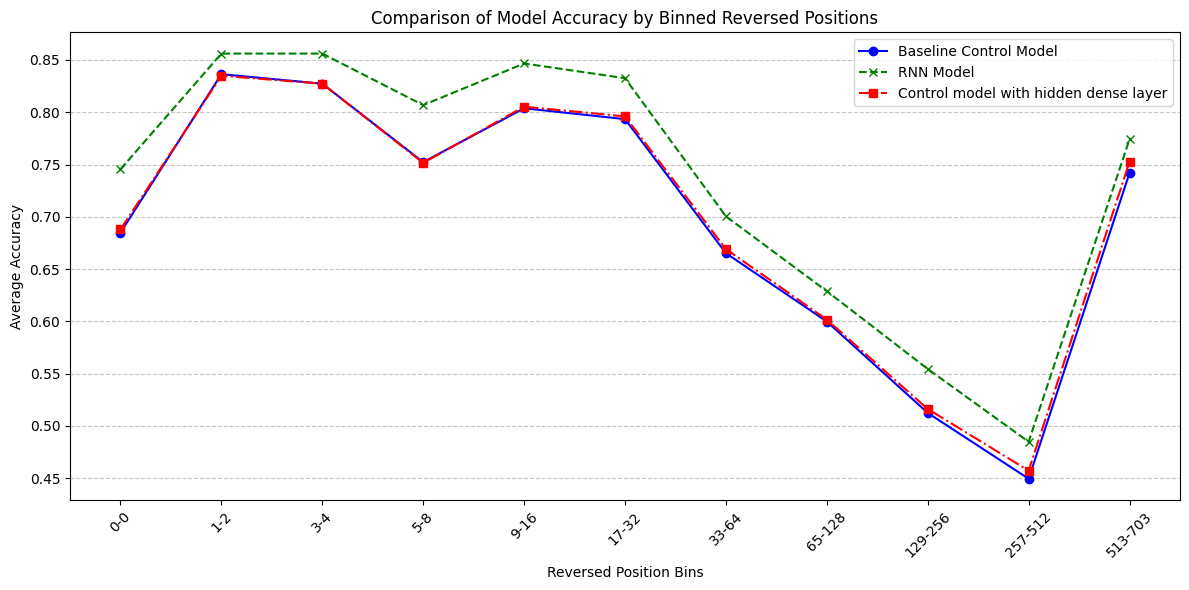

In [ ]:
# Plot all three results on the same figure
plt.figure(figsize=(12, 6))

# Plot for Control Model (GLM)
plt.plot(bin_labels_reversed, accuracies_sorted_bar_reversed, marker='o', linestyle='-', color='blue', label='Baseline Control Model')

# Plot for RNN Model
plt.plot(bin_labels_reversed, accuracies_sorted_reversed2, marker='x', linestyle='--', color='green', label='RNN Model')

# Plot for Control Model 3
plt.plot(bin_labels_reversed, accuracies_sorted_bar_reversed3, marker='s', linestyle='-.', color='red', label='Control model with hidden dense layer')

# Formatting
plt.xticks(rotation=45)
plt.xlabel('Reversed Position Bins')
plt.ylabel('Average Accuracy')
plt.title('Comparison of Model Accuracy by Binned Reversed Positions')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

plt.show()


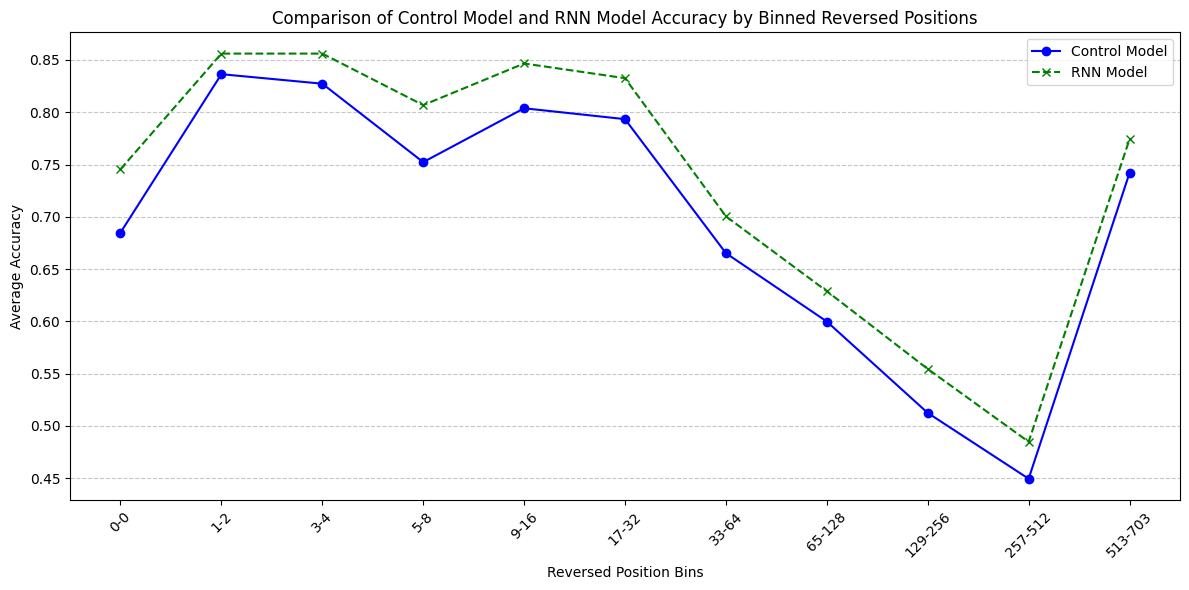

In [ ]:
# Plot both results on the same figure
plt.figure(figsize=(12, 6))

# Plot for Control Model
plt.plot(bin_labels_reversed, accuracies_sorted_bar_reversed, marker='o', linestyle='-', color='blue', label='Control Model')

# Plot for RNN Model
plt.plot(bins_sorted_reversed2, accuracies_sorted_reversed2, marker='x', linestyle='--', color='green', label='RNN Model')

# Formatting
plt.xticks(rotation=45)
plt.xlabel('Reversed Position Bins')
plt.ylabel('Average Accuracy')
plt.title('Comparison of Control Model and RNN Model Accuracy by Binned Reversed Positions')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

plt.show()
